In [ ]:
'''
Objectif : découvrir les aspects du poste d'un employé d'une entreprise 
qui rendent cet employé plus susceptible de quitter l'entreprise.
'''

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\pierr\OneDrive\Bureau\DATA\Datasets\DDI Dataset - HR Attrition - hr_attrition.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
#Info des colonnes "object"
display(df['salary'].unique())
display(df['sales'].unique())


array(['low', 'medium', 'high'], dtype=object)

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
#Séparation cible - variables explicatives
df_target = df['left']
df_feat = df.drop('left',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, random_state=42)

In [8]:
#Conversion des colonnes "object"
#Salary est une variable catégorielle ordinale, on remplace par une suite numérique ordinale
X_train['salary'] = X_train['salary'].replace(['low', 'medium', 'high'], [0, 1, 2])

#Sales est une variable catégorielle nominale, on utilise get_dummies.
X_train = pd.get_dummies(X_train, columns=['sales'])


In [10]:
#Entraînement d'un modèle de classification
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RandomForestClassifier()

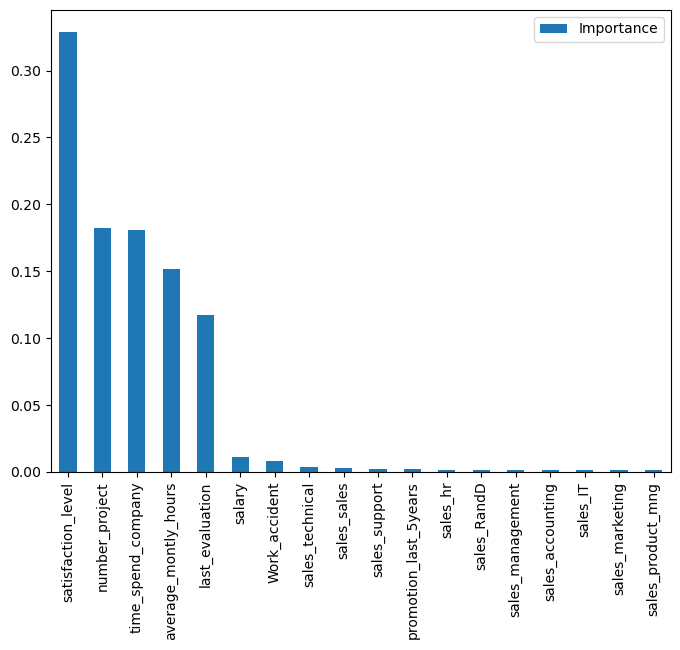

In [13]:
import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(RFC.feature_importances_, index= X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.show()

'''
On voit sur ce graphique que le niveau de satisfaction (satisfaction_level)
et dans une moindre mesure le nombre de projets alloués à l'employé (number_project)
et le nombre d'années passées dans l'entreprise (time_spend_company) 
sont les trois variables qui sont le plus corrélées au départ d'un employé de l'entreprise. 

'''